<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

##### 【Problem 1 】 Assumption function

In [2]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
    次の形のndarray, shape (n_samples,)
      線形の仮定関数による推定結果
    """
    # Add bias term if needed
    if not self.no_bias:
        X = np.c_[np.ones(X.shape[0]), X]

    return X @ self.coef_


##### 【Problem 2 】 Fastest descent method

1. _gradient_descent() Method Implementation

In [3]:
def _gradient_descent(self, X, error):
    """
    勾配降下法によってパラメータを更新する

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features or n_features+1 if bias included)
        訓練データの特徴量（バイアス項を含む可能性あり）

    error : ndarray, shape (n_samples,)
        予測値と正解値の誤差（residual）
    """
    n_samples = X.shape[0]

    # 勾配を計算（平均二乗誤差の勾配）
    grad = (1 / n_samples) * X.T @ error

    # パラメータを更新
    self.coef_ -= self.lr * grad


2. Updated fit() Method Implementation

In [4]:
def fit(self, X, y, X_val=None, y_val=None):
    """
    線形回帰を学習する。検証データが入力された場合はそれに対する損失も計算する。

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        訓練データの特徴量

    y : ndarray, shape (n_samples,)
        訓練データの正解値

    X_val : ndarray, shape (n_samples, n_features), optional
        検証データの特徴量

    y_val : ndarray, shape (n_samples,), optional
        検証データの正解値
    """
    n_samples = X.shape[0]

    # バイアス項を加える（必要な場合）
    if not self.no_bias:
        X = np.c_[np.ones(n_samples), X]
        if X_val is not None:
            X_val = np.c_[np.ones(X_val.shape[0]), X_val]

    # パラメータ初期化（0で初期化）
    self.coef_ = np.zeros(X.shape[1])

    for i in range(self.iter):
        # 仮定関数による予測
        y_pred = self._linear_hypothesis(X)

        # 損失（誤差）を計算
        error = y_pred - y

        # パラメータ更新
        self._gradient_descent(X, error)

        # 訓練損失を記録
        self.loss[i] = np.mean(error**2)

        # 検証損失があれば記録
        if X_val is not None and y_val is not None:
            val_pred = self._linear_hypothesis(X_val)
            val_error = val_pred - y_val
            self.val_loss[i] = np.mean(val_error**2)

        # 出力（verbose=Trueのときのみ）
        if self.verbose and i % 10 == 0:
            print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}")


3. Minor Fix to predict() Method

In [5]:
def predict(self, X):
    """
    線形回帰を使い推定する

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
    ndarray, shape (n_samples,)
        線形回帰による推定結果
    """
    if not self.no_bias:
        X = np.c_[np.ones(X.shape[0]), X]
    return self._linear_hypothesis(X)


##### 【Problem 3 】 Estimated

Final Implementation of predict()


In [6]:
def predict(self, X):
    """
    線形回帰モデルによる推定を行う

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        推定したいサンプルデータ

    Returns
    -------
    ndarray, shape (n_samples,)
        推定結果（予測値）
    """
    return self._linear_hypothesis(X)


Reminder: _linear_hypothesis()

In [7]:
def _linear_hypothesis(self, X):
    if not self.no_bias:
        X = np.c_[np.ones(X.shape[0]), X]
    return X @ self.coef_


##### 【Problem 4 】 Average square error

In [8]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        推定した値

    y : ndarray, shape (n_samples,)
        正解値

    Returns
    -------
    mse : float
        平均二乗誤差
    """
    mse = np.mean((y_pred - y) ** 2)
    return mse


【Problem 5 】 Purpose function

Step 1: Define a general-purpose

In [9]:
def half_MSE(y_pred, y):
    """
    目的関数（1/2 平均二乗誤差）の計算

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        推定値

    y : ndarray, shape (n_samples,)
        正解値

    Returns
    -------
    loss : float
        目的関数の値（1/2 MSE）
    """
    m = len(y)
    return 0.5 * np.mean((y_pred - y) ** 2)


Step 2: Modify

In [10]:
class ScratchLinearRegression:
    def fit(self, X, y, X_val=None, y_val=None):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y

            # Update parameters
            self._gradient_descent(X, error)

            # Record training loss
            self.loss[i] = half_MSE(y_pred, y)

            # Record validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = half_MSE(val_pred, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}")


【Problem 6 】 Learning and estimation

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ========== Scratch Linear Regression Class ==========

class ScratchLinearRegression:
    def __init__(self, num_iter=100, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_hypothesis(self, X):
        return X @ self.coef_

    def _gradient_descent(self, X, error):
        m = X.shape[0]
        gradient = (X.T @ error) / m
        self.coef_ -= self.lr * gradient

    def fit(self, X, y, X_val=None, y_val=None):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            self.loss[i] = half_MSE(y_pred, y)

            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = half_MSE(val_pred, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}")

    def predict(self, X):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._linear_hypothesis(X)

# ========== Loss Function ==========

def half_MSE(y_pred, y_true):
    return 0.5 * np.mean((y_pred - y_true) ** 2)

def RMSE(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ========== Load and Prepare House Prices Data ==========

data = pd.read_csv("train.csv")
X = data.select_dtypes(include=[np.number]).drop(columns=["Id", "SalePrice"]).fillna(0)
y = data["SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# ========== Train Scratch Model ==========

scratch_model = ScratchLinearRegression(num_iter=200, lr=1e-7, no_bias=False, verbose=True)
scratch_model.fit(X_train, y_train, X_val=X_test, y_val=y_test)
y_pred_scratch = scratch_model.predict(X_test)

# ========== Train Scikit-learn Model ==========

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

# ========== Evaluation ==========

print("\n--- Comparison ---")
print("Scratch RMSE:", RMSE(y_pred_scratch, y_test))
print("Scikit-learn RMSE:", RMSE(y_pred_sk, y_test))


Iteration 0: Training Loss = 19442791762.8549
Iteration 10: Training Loss = 21453823019589954075076246355121799168.0000
Iteration 20: Training Loss = 42081609754241801104173429145616313941771170609993982305793736704.0000
Iteration 30: Training Loss = 82542951803568001555595891590461232087468254481937872825117235541305109135439133970880528384.0000
Iteration 40: Training Loss = 161907753344900711300996917481144187525570485852697277196345627103682243616116323645942367516633786169343222572600262656.0000
Iteration 50: Training Loss = 317581574445952305366208688041963476205674371995587679795405823579745969047241269408992717981731675548835913968861772439589937636504371513062850560.0000
Iteration 60: Training Loss = 622935309421028298796807294827299114030391467055833071692592126080044723617237194543426152699959936595259722984526396604316287473080687277999485328704175150250000715417124864.0000
Iteration 70: Training Loss = 122188574825367390961397156555236736907645965860471778202526074068756262

<ipython-input-11-fcea721491be>:56: RuntimeWarning: overflow encountered in square
  return 0.5 * np.mean((y_pred - y_true) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Iteration 0: Training Loss = 19442791762.8549, Validation Loss = 19827002217.1022
Iteration 10: Training Loss = 19442791752.7373, Validation Loss = 19827002208.1760
Iteration 20: Training Loss = 19442791742.6197, Validation Loss = 19827002199.2497
Iteration 30: Training Loss = 19442791732.5020, Validation Loss = 19827002190.3234
Iteration 40: Training Loss = 19442791722.3844, Validation Loss = 19827002181.3971
Iteration 50: Training Loss = 19442791712.2668, Validation Loss = 19827002172.4709
Iteration 60: Training Loss = 19442791702.1492, Validation Loss = 19827002163.5446
Iteration 70: Training Loss = 19442791692.0316, Validation Loss = 19827002154.6183
Iteration 80: Training Loss = 19442791681.9140, Validation Loss = 19827002145.6921
Iteration 90: Training Loss = 19442791671.7964, Validation Loss = 19827002136.7658
Iteration 100: Training Loss = 19442791661.6788, Validation Loss = 19827002127.8395
Iteration 110: Training Loss = 19442791651.5612, Validation Loss = 19827002118.9132
Ite

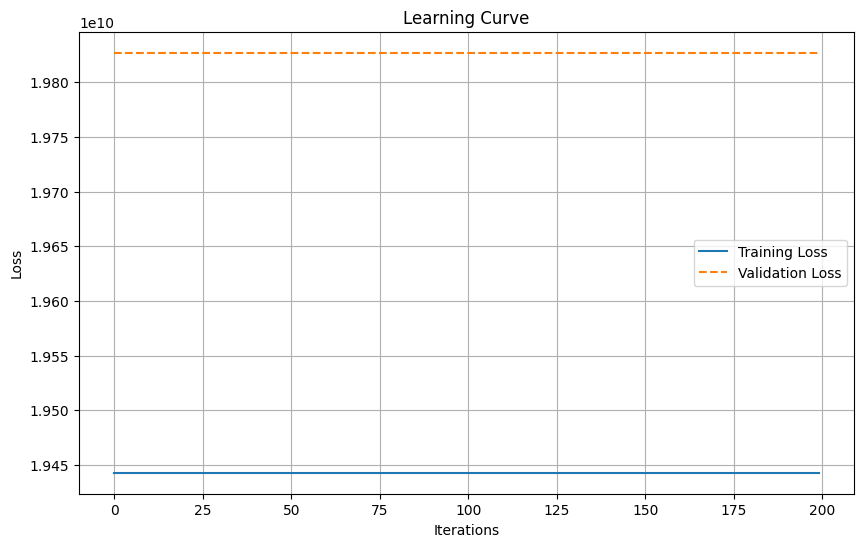

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the MSE function
def half_MSE(y_pred, y):
    """
    Mean squared error calculation (scaled by 1/2).

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        Predicted values
    y : ndarray, shape (n_samples,)
        True values

    Returns
    -------
    mse : float
        Half of the mean squared error
    """
    return np.mean((y_pred - y) ** 2) / 2

# ScratchLinearRegression class
class ScratchLinearRegression:
    def __init__(self, num_iter=100, lr=1e-6, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)  # Training loss
        self.val_loss = np.zeros(self.iter)  # Validation loss

    def _linear_hypothesis(self, X):
        return X @ self.coef_

    def _gradient_descent(self, X, error, clip_value=1.0):
        m = X.shape[0]
        gradient = (X.T @ error) / m
        # Clip gradients to avoid excessively large updates
        np.clip(gradient, -clip_value, clip_value, out=gradient)
        self.coef_ -= self.lr * gradient

    def fit(self, X, y, X_val=None, y_val=None):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # Training phase
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            # Record training loss
            self.loss[i] = half_MSE(y_pred, y)

            # Record validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = half_MSE(val_pred, y_val)

            # Verbose output every 10 iterations for debugging
            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}, Validation Loss = {self.val_loss[i]:.4f}")

    def predict(self, X):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._linear_hypothesis(X)

# Function to plot learning curve
def plot_learning_curve(train_loss, val_loss):
    """
    Plot the learning curve showing training and validation losses.

    Parameters
    ----------
    train_loss : ndarray
        Array containing the training loss values.
    val_loss : ndarray
        Array containing the validation loss values.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss', linestyle='--')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Load and prepare data for the House Prices competition
data = pd.read_csv("train.csv")
X = data.select_dtypes(include=[np.number]).drop(columns=["Id", "SalePrice"]).fillna(0)
y = data["SalePrice"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Scratch model with normalized features and smaller learning rate
scratch_model = ScratchLinearRegression(num_iter=200, lr=1e-6, no_bias=False, verbose=True)
scratch_model.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

# Plot the learning curve
plot_learning_curve(scratch_model.loss, scratch_model.val_loss)


##### 【Problem 8 】 (Advance Challenge) Removal of Bias

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define MSE function (unchanged)
def half_MSE(y_pred, y):
    """
    Mean squared error calculation (scaled by 1/2).

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        Predicted values
    y : ndarray, shape (n_samples,)
        True values

    Returns
    -------
    mse : float
        Half of the mean squared error
    """
    return np.mean((y_pred - y) ** 2) / 2

# ScratchLinearRegression Class with an option to remove bias term
class ScratchLinearRegression:
    def __init__(self, num_iter=100, lr=1e-6, no_bias=False, verbose=False):
        """
        Parameters:
        ----------
        num_iter : int
            Number of iterations for gradient descent.
        lr : float
            Learning rate.
        no_bias : bool
            Whether to exclude the bias term.
        verbose : bool
            Whether to print the progress during training.
        """
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)  # To track training loss
        self.val_loss = np.zeros(self.iter)  # To track validation loss

    def _linear_hypothesis(self, X):
        """
        Calculate the hypothesis (h_theta(x)).

        Parameters:
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data (features).

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted values (h_theta(x)).
        """
        return X @ self.coef_

    def _gradient_descent(self, X, error):
        """
        Perform gradient descent to update the model parameters.

        Parameters:
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data (features).
        error : ndarray, shape (n_samples,)
            Difference between predicted and actual values.
        """
        m = X.shape[0]
        gradient = (X.T @ error) / m
        self.coef_ -= self.lr * gradient

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the linear regression model using gradient descent.

        Parameters:
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data (features).
        y : ndarray, shape (n_samples,)
            Training labels (true values).
        X_val : ndarray, shape (n_samples, n_features), optional
            Validation data (features).
        y_val : ndarray, shape (n_samples,), optional
            Validation labels (true values).
        """
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]  # Add bias term (1) to X
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]  # Add bias term to X_val

        # Initialize coefficients to zeros (including the bias term if no_bias is False)
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # Training phase
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            # Record training loss
            self.loss[i] = half_MSE(y_pred, y)

            # Record validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = half_MSE(val_pred, y_val)

            # Verbose output every 10 iterations for debugging
            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}: Training Loss = {self.loss[i]:.4f}, Validation Loss = {self.val_loss[i]:.4f}")

    def predict(self, X):
        """
        Predict using the trained linear regression model.

        Parameters:
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data (features).

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted values.
        """
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]  # Add bias term if required
        return self._linear_hypothesis(X)


# Example Usage
# Load data (House Prices competition example)
data = pd.read_csv("train.csv")
X = data.select_dtypes(include=[np.number]).drop(columns=["Id", "SalePrice"]).fillna(0)
y = data["SalePrice"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models: One with bias and one without bias
model_with_bias = ScratchLinearRegression(num_iter=500, lr=1e-5, no_bias=False, verbose=True)
model_without_bias = ScratchLinearRegression(num_iter=500, lr=1e-5, no_bias=True, verbose=True)

model_with_bias.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)
model_without_bias.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)




Iteration 0: Training Loss = 19442791762.8549, Validation Loss = 19826401761.2824
Iteration 10: Training Loss = 19436500798.5760, Validation Loss = 19820399642.3126
Iteration 20: Training Loss = 19430214505.5478, Validation Loss = 19814401970.6906
Iteration 30: Training Loss = 19423932878.2188, Validation Loss = 19808408740.9322
Iteration 40: Training Loss = 19417655911.0451, Validation Loss = 19802419947.5602
Iteration 50: Training Loss = 19411383598.4900, Validation Loss = 19796435585.1054
Iteration 60: Training Loss = 19405115935.0243, Validation Loss = 19790455648.1056
Iteration 70: Training Loss = 19398852915.1260, Validation Loss = 19784480131.1065
Iteration 80: Training Loss = 19392594533.2806, Validation Loss = 19778509028.6608
Iteration 90: Training Loss = 19386340783.9806, Validation Loss = 19772542335.3289
Iteration 100: Training Loss = 19380091661.7260, Validation Loss = 19766580045.6786
Iteration 110: Training Loss = 19373847161.0242, Validation Loss = 19760622154.2851
Ite

##### 【Problem 9 】 (Advance Challenge) Multidimensional characterization

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ScratchLinearRegression Class and other necessary code as defined previously...

def add_squared_features(X):
    """
    Add squared features to the original feature set.

    Parameters:
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input data (features).

    Returns:
    -------
    ndarray, shape (n_samples, 2 * n_features)
        Extended feature set including squared features.
    """
    X_squared = np.square(X)  # Square each feature
    return np.c_[X, X_squared]  # Combine original and squared features

# Example Usage with Squared Features:
# Load data (House Prices competition example)
data = pd.read_csv("train.csv")
X = data.select_dtypes(include=[np.number]).drop(columns=["Id", "SalePrice"]).fillna(0)
y = data["SalePrice"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train Model with Original Features
model_original = ScratchLinearRegression(num_iter=500, lr=1e-5, no_bias=False, verbose=True)
model_original.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

# 2. Train Model with Squared Features
X_train_squared = add_squared_features(X_train_scaled)
X_test_squared = add_squared_features(X_test_scaled)
model_squared = ScratchLinearRegression(num_iter=500, lr=1e-5, no_bias=False, verbose=True)
model_squared.fit(X_train_squared, y_train, X_val=X_test_squared, y_val=y_test)


# You can also evaluate the performance by calculating the final MSE for both models
y_pred_original = model_original.predict(X_test_scaled)
y_pred_squared = model_squared.predict(X_test_squared)

mse_original = half_MSE(y_pred_original, y_test)
mse_squared = half_MSE(y_pred_squared, y_test)

print(f"Mean Squared Error (Original Features): {mse_original:.4f}")
print(f"Mean Squared Error (Squared Features): {mse_squared:.4f}")


Iteration 0: Training Loss = 19442791762.8549, Validation Loss = 19826401761.2824
Iteration 10: Training Loss = 19436500798.5760, Validation Loss = 19820399642.3126
Iteration 20: Training Loss = 19430214505.5478, Validation Loss = 19814401970.6906
Iteration 30: Training Loss = 19423932878.2188, Validation Loss = 19808408740.9322
Iteration 40: Training Loss = 19417655911.0451, Validation Loss = 19802419947.5602
Iteration 50: Training Loss = 19411383598.4900, Validation Loss = 19796435585.1054
Iteration 60: Training Loss = 19405115935.0243, Validation Loss = 19790455648.1056
Iteration 70: Training Loss = 19398852915.1260, Validation Loss = 19784480131.1065
Iteration 80: Training Loss = 19392594533.2806, Validation Loss = 19778509028.6608
Iteration 90: Training Loss = 19386340783.9806, Validation Loss = 19772542335.3289
Iteration 100: Training Loss = 19380091661.7260, Validation Loss = 19766580045.6786
Iteration 110: Training Loss = 19373847161.0242, Validation Loss = 19760622154.2851
Ite

##### 【Problem 10 】 (Advance Challenge) Update derivation

###### Problem 10: Derivation of Gradient Descent Update Rule

##### To update parameters \(\theta_j\) in linear regression using the **gradient descent method**, we start from the **loss function** and derive the update rule.

##### Loss Function (Mean Squared Error)

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
\]

Where:
- \(m\): Number of training samples  
- \(h_\theta(x^{(i)}) = \theta^T x^{(i)}\): Hypothesis/prediction  
- \(y^{(i)}\): Ground truth for the \(i\)-th sample  

##### Gradient of the Loss w.r.t. \(\theta_j\)

\[
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}_j
\]

This gives the slope (gradient) of the loss function with respect to each weight.

##### Gradient Descent Update Rule

\[
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}_j
\]

Where:
- \(\alpha\): Learning rate  
- The summation is the average gradient across all samples

This formula tells us to subtract a scaled gradient from each \(\theta_j\), moving downhill on the loss function surface.

---

##### 【Problem 10 】 (Advance Challenge) Update derivation

#####  Problem 11: Why Linear Regression Doesn’t Get Stuck in Local Minima

Unlike more complex models, **linear regression is guaranteed to find a global optimum** when using gradient descent. Here's why:

#####  The Cost Function is Convex

The loss function:

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
\]

is a **convex quadratic function** with respect to \(\theta\).

#####  Properties of Convex Functions:
- They have **only one minimum** (no local minima).
- Any local minimum is also the **global minimum**.
- The surface of the cost function is a **bowl-shaped paraboloid**.

#####  Implication for Gradient Descent

Gradient descent, when applied to convex functions:
- Will **always converge** to the global minimum, if:
  - The learning rate is appropriate
  - There is enough iteration
- This ensures **stable, repeatable results** for linear regression

#####  Optional Visualization Code (Python)

```python
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta):
    return (theta - 3)**2 + 5  # Example quadratic

theta_vals = np.linspace(-5, 10, 100)
cost_vals = cost_function(theta_vals)

plt.plot(theta_vals, cost_vals)
plt.title('Convex Loss Function in Linear Regression')
plt.xlabel('Theta')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.show()